In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pickle
import ast
import pandas
from numpy import array  
import nbimporter
import auto_encoder as aec
np.set_printoptions(suppress=True)

Importing Jupyter notebook from auto_encoder.ipynb


In [2]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [3]:
# Linking Id's
'''
project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\ratings.csv")
rating = pandas.read_csv(data_path)

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\links.csv")
links = pandas.read_csv(data_path)

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movies_metadata.csv")
movie_meta = pandas.read_csv(data_path)

joined = links.set_index('tmdbId').join(movie_meta.set_index('id'))

writer = pandas.ExcelWriter('linked_movieIds.xlsx')
joined.to_excel(writer,'Sheet1')
writer.save()
'''

'\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\ratings.csv")\nrating = pandas.read_csv(data_path)\n\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\links.csv")\nlinks = pandas.read_csv(data_path)\n\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\movies_metadata.csv")\nmovie_meta = pandas.read_csv(data_path)\n\njoined = links.set_index(\'tmdbId\').join(movie_meta.set_index(\'id\'))\n\nwriter = pandas.ExcelWriter(\'linked_movieIds.xlsx\')\njoined.to_excel(writer,\'Sheet1\')\nwriter.save()\n'

In [4]:
# Removing less-voted movies & least frequent voters from ratings.csv
'''
project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\ratings.csv")
rating = pandas.read_csv(data_path, engine='python')

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movie_votecount.csv")
vote_count = pandas.read_csv(data_path)

votes = column(vote_count.values, 0)
ratings_updated = rating.loc[rating["movieId"].isin(votes)]

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\user_votecount.csv")
user_vote = pandas.read_csv(data_path)

votes = column(user_vote.values, 0)
ratings_updated = ratings_updated.loc[ratings["userId"].isin(votes)]

file = open("ratings_updated", "wb")
pickle.dump(ratings_updated, file)
'''

'\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\ratings.csv")\nrating = pandas.read_csv(data_path, engine=\'python\')\n\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\movie_votecount.csv")\nvote_count = pandas.read_csv(data_path)\n\nvotes = column(vote_count.values, 0)\nratings_updated = rating.loc[rating["movieId"].isin(votes)]\n\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\user_votecount.csv")\nuser_vote = pandas.read_csv(data_path)\n\nvotes = column(user_vote.values, 0)\nratings_updated = ratings_updated.loc[ratings["userId"].isin(votes)]\n\nfile = open("ratings_updated", "wb")\npickle.dump(ratings_updated, file)\n'

In [5]:
file = open("ratings_updated", "rb")
rating = pickle.load(file)

In [6]:
# Removing less-voted movies & least frequent voters from ratings.csv
'''
project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movie_votecount2.csv")
movie_vote = pandas.read_csv(data_path)
votes = column(movie_vote.values, 0)
ratings_updated = rating.loc[rating["movieId"].isin(votes)]

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\user_votecount2.csv")
user_vote = pandas.read_csv(data_path)

votes = column(user_vote.values, 0)
ratings_updated = ratings_updated.loc[rating["userId"].isin(votes)]
file = open("ratings_reduced", "wb")
pickle.dump(ratings_updated, file)
'''

'\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\movie_votecount2.csv")\nmovie_vote = pandas.read_csv(data_path)\nvotes = column(movie_vote.values, 0)\nratings_updated = rating.loc[rating["movieId"].isin(votes)]\n\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\user_votecount2.csv")\nuser_vote = pandas.read_csv(data_path)\n\nvotes = column(user_vote.values, 0)\nratings_updated = ratings_updated.loc[rating["userId"].isin(votes)]\nfile = open("ratings_updated_2", "wb")\npickle.dump(ratings_updated, file)\n'

In [7]:
file = open("ratings_reduced", "rb")
ratings_updated = pickle.load(file)

In [8]:
# Movie matrix build
movies = ratings_updated["movieId"]
movies = set(movies)
movies = sorted(movies, key=lambda x: int(x), reverse=False)

In [9]:
# User matrix build
users = ratings_updated["userId"]
users = set(users)
users = sorted(users, key=lambda x: int(x), reverse=False)

In [10]:
'''
# User-movie matrix build
user_movie = np.zeros((len(users),len(movies)), dtype=float)

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movies.csv")
movies_meta = pandas.read_csv(data_path, encoding = "ISO-8859-1")

# Fill non-rated movies as the average rating of that movie
for i in range(len(movies)):
    rating_of_i = (movies_meta.loc[movies_meta["movieId"] == movies[i]])["vote_average"].values[0]
    x = np.full((len(users),), rating_of_i / 2, dtype=float)
    user_movie[:,i] = x

for index, row in ratings_updated.iterrows():
    user_movie[users.index(row['userId'])][movies.index(row['movieId'])] = row['rating']
    
print(np.shape(user_movie))
file = open("user_movie", "wb")
pickle.dump(user_movie, file)
'''

'\n# User-movie matrix build\nuser_movie = np.zeros((len(users),len(movies)), dtype=float)\n\nproject_root = os.path.dirname(os.path.abspath(""))\ndata_path = os.path.join(project_root, "data\\movies.csv")\nmovies_meta = pandas.read_csv(data_path, encoding = "ISO-8859-1")\n\n# Fill non-rated movies as the average rating of that movie\nfor i in range(len(movies)):\n    rating_of_i = (movies_meta.loc[movies_meta["movieId"] == movies[i]])["vote_average"].values[0]\n    x = np.full((len(users),), rating_of_i / 2, dtype=float)\n    user_movie[:,i] = x\n\nfor index, row in ratings_updated.iterrows():\n    user_movie[users.index(row[\'userId\'])][movies.index(row[\'movieId\'])] = row[\'rating\']\n    \nprint(np.shape(user_movie))\nfile = open("user_movie", "wb")\npickle.dump(user_movie, file)\n'

In [11]:
# Load user-movie matrix
file = open("user_movie", "rb")
user_movie = pickle.load(file)
np.shape(user_movie)

(1000, 499)

(1000, 499, 1)
Epoch: 0
Error: 76.20384565444428
Epoch: 1
Error: 45.32424963035593
Epoch: 2
Error: 29.8559134165281
Epoch: 3
Error: 22.89289455092436
Epoch: 4
Error: 20.478128840377
Epoch: 5
Error: 20.37436174333767


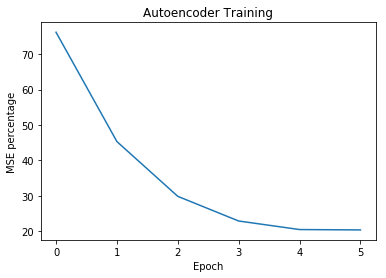

[76.20384565444428, 45.32424963035593, 29.8559134165281, 22.89289455092436, 20.478128840377, 20.37436174333767]


In [12]:
# Train the Autoencoder to get user features
neuron_list = [499,350,250,180,100,75,100,180,250,350,499]
nn = aec.Autoencoder(neuron_list, 0.01, 300)
inp = np.transpose([np.transpose(user_movie)])
print(np.shape(inp))
err = nn.train(inp,inp, 6)
plt.plot(err)
plt.title('Autoencoder Training')
plt.xlabel('Epoch')
plt.ylabel('MSE percentage')
plt.show()
print(err)

In [13]:
# Extract user-features after training
features = []
for i in range(len(user_movie)):
    encoded = nn.encode(inp[i])
    features.append(encoded)
features = array(features)

In [14]:
'''
for i in range(len(features[0])):
    mean_i = np.mean(column(features,i))
    std_i = np.std(column(features,i))
    for j in range(len(features)):
        features[j][i] -= mean_i
        features[j][i] /= std_i
'''

'\nfor i in range(len(features[0])):\n    mean_i = np.mean(column(features,i))\n    std_i = np.std(column(features,i))\n    for j in range(len(features)):\n        features[j][i] -= mean_i\n        features[j][i] /= std_i\n'

In [15]:
user_features = []
for i in range(len(users)):
    user_features.append([users[i], features[i]])

In [16]:
file = open("user_features", "wb")
pickle.dump(user_features, file)